#**To explore Supervised Machine Learning**

**Importing a bunch of libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math

**Reading data from the given url**

In [ ]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print(data.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


**Check for any null values in the data**

In [ ]:
print(data.isnull().any())

Hours     False
Scores    False
dtype: bool


The data contains two colums: Hours and Scores
We need to predict Scores given Hours. So take the Hours feature as x and Scores as y so that we can predict y given x

In [ ]:
x=data["Hours"].values.reshape(-1,1)
y=data["Scores"].values.reshape(-1,1)


Since there is only one feature available for the prediction of scores and we are using linear regression for prediction, it is necessary that both these variables should have a linear relationship between them 

Only then we will be able to predict correctly

Check for the relation between variables using matplot lib scatter plot

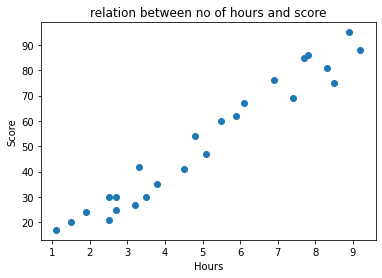

In [ ]:
plt.title("relation between no of hours and score")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.scatter(x,y)
plt.show()

Since a linear relationship is existing between the variables we can go forward with linear regression model

**Splitting data**

In order to test the model properly, we split the data into train and test

We train the model using train data and check its accuracy in both train and test data.

Only if the model performs better in train and test data, then the model is considered as properly trained

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

**Model training**

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()


In [ ]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The predicted value of scores= Wx+b
where w is the coefficients from the trained model, x is the no of hours and b is the intercept

So we check if the realtion between predicted y -x and orginal y-x is matching or not

In [ ]:
pred=model.coef_*x_train+model.intercept_

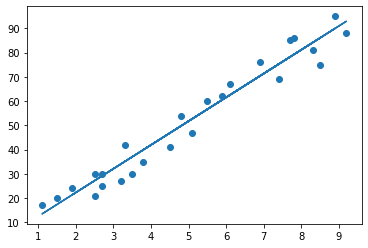

In [ ]:
plt.scatter(x, y)
plt.plot(x_train, pred);
plt.show()

So the predicted y is almost matching with the orginal y

**Checking the training and testing mean square error**

In [ ]:
mse=0
for i in range(x_train.shape[0]):
  mse+=(pred[i]-y_train[i])**2

print("training mse is ",math.sqrt(mse)/x_train.shape[0])


training mse is  1.1768794801684257


In [ ]:
pred_test=model.predict(x_test)

In [ ]:
mse=0
for i in range(x_test.shape[0]):
  mse+=(pred_test[i]-y_test[i])**2

print("testing mse is ",math.sqrt(mse)/x_test.shape[0])


testing mse is  2.6191888267434016


In [ ]:
y_hat=[]
for i in pred_test:
  y_hat.append(i[0])

actual=[]
for i in y_test:
  actual.append(i[0])


In [ ]:
comp=pd.DataFrame({"actual":actual,"pred":y_hat})
print(comp.head())

   actual       pred
0      20  17.371423
1      47  52.702923
2      42  35.037173
3      27  34.055743
4      41  46.814340


Lets try to improve the performance using properly tuned hyper parameters

In [ ]:
new_model =sklearn.linear_model.Ridge()

In [ ]:
params={"alpha":[1e-4,0.0001,0.001,0.01,0.1,1,10,100]}
from sklearn.model_selection import GridSearchCV
grid_cfl=GridSearchCV(new_model,param_grid=params,n_jobs=-1,return_train_score=True,cv=5)

In [ ]:
grid_cfl.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
grid_cfl.best_params_

{'alpha': 0.1}

In [ ]:
new_model=sklearn.linear_model.Ridge(alpha=0.1)

In [ ]:
new_model.fit(x_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_train_hat=new_model.predict(x_train)

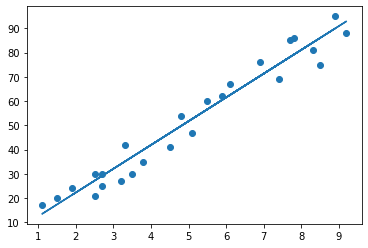

In [ ]:
plt.scatter(x, y)
plt.plot(x_train, y_train_hat);
plt.show()

In [ ]:
mse=0
for i in range(x_train.shape[0]):
  mse+=(y_train_hat[i]-y_train[i])**2

print("training mse is ",math.sqrt(mse)/x_train.shape[0])


training mse is  1.1768872525738001


In [ ]:
y_test_hat=new_model.predict(x_test)

In [ ]:
mse=0
for i in range(x_test.shape[0]):
  mse+=(y_test_hat[i]-y_test[i])**2

print("testing mse is ",math.sqrt(mse)/x_test.shape[0])


testing mse is  2.61890982987288


For both models the performance is same

In [ ]:
sample_x=np.array([9.25])
score_1=model.predict(sample_x.reshape(-1,1))
score_2=new_model.predict(sample_x.reshape(-1,1))

In [ ]:
print("score from 1st model is ",score_1)
print("score from second model is ",score_2)

score from 1st model is  [[93.43229054]]
score from second model is  [[93.40345028]]


In [ ]:
from sklearn import metrics  
print('Mean Absolute Error model 1:', metrics.mean_absolute_error(y_test, y_hat))
print('Mean Absolute Error model 2:', metrics.mean_absolute_error(y_test, y_test_hat))

Mean Absolute Error model 1: 5.632881746692994
Mean Absolute Error model 2: 5.628979171339398
